# Mandelbrot set

<img src="https://quotepark.com/media/authors/benoit-mandelbrot.detail.jpeg" width="256px" align="left" margin="16px /">

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is one of these iconic abstract object popular outside of mathematics for its aesthetic appeal.
Along with LOL cats, YouTube is filled with psychedelic videos deep diving into its incredibly complicated fractal structure.
Like many other fractal objects, the Mandelbrot set is often used in introductory classes to [Generative Art](https://en.wikipedia.org/wiki/Generative_art), see for instance [Olbaid-ST](https://www.deviantart.com/olbaid-st/gallery/36049300/ultrafractal).

Despite what its name suggests, the Mandelbrot set was not discovered by [Benoît Mandelbrot](https://en.wikipedia.org/wiki/Benoit_Mandelbrot), a Polish-born French-American mathematician.
It finds its origin in the field of **complex dynamics**, first studied by [Pierre Fatou](https://en.wikipedia.org/wiki/Pierre_Fatou) and [Gaston Julia](https://en.wikipedia.org/wiki/Gaston_Julia) in the early 1900s.
It was properly defined in 1978 by [Robert W. Brooks](https://en.wikipedia.org/wiki/Robert_W._Brooks) and Peter Matelski.
They were also the firsts to publish a computer-generated visualization of the Mandelbrot set, shown below.
[Adrien Douaby](https://en.wikipedia.org/wiki/Adrien_Douady) and [John H. Hubbard](https://en.wikipedia.org/wiki/John_H._Hubbard) were the first to really study the mathematical properties of the Mandelbrot set.
They are also the ones who named the set in honor of Mandelbrot for his influential work in fractal geometry.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Mandel.png" width="512px" align="center" margin="16px" />

**<center>The first published picture of the Mandelbrot set, by R. Brooks & P. Matelski in 1978. From [Wikipedia](https://en.wikipedia.org/wiki/Mandelbrot_set).</center>**

This visualization was primarily limited by the computational power and printing technology available back then.
Today, even a fairly standard laptop has enough computational power to generate visualizations of the Mandelbrot set with far more details than the 1978 image.
Mathematicians and artists alike regularly come up with new ways to render this incredible mathematical object.
One such example is shown below.

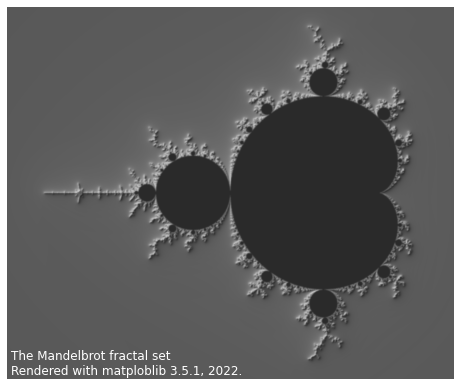

In [1]:
import numpy as np
import numba as nb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import time

# --> Compute the Mandelbrot set.
@nb.jit(nopython=True)
def mandelbrot_kernel(c, maxiter, horizon):
    z = 0
    for i in range(maxiter):
        z = z**2 + c
        
        if np.abs(z) > horizon:
            return z, i

    return z, 0

@np.vectorize
def mandelbrot(c, maxiter=1000, horizon=2):
    return mandelbrot_kernel(c, maxiter, horizon)

# --> Mesh the complex plane.
cr = np.linspace(-2.25, 0.75, 3000)
ci = np.linspace(-1.25, 1.25, 2500)
c = cr[:, None] + 1j*ci[None, :]

# --> Computation.
maxiter, horizon = 1000, 2**40
z, n = mandelbrot(c, maxiter, horizon)

# --> Render the Mandelbrot set.
log_horizon = np.log2(np.log(horizon))
with np.errstate(invalid="ignore"):
    M = np.nan_to_num(n + 1 - np.log2(np.log(np.abs(z))) + log_horizon)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M.T, cmap=plt.cm.gray, vert_exag=1.5, norm=colors.PowerNorm(0.3), blend_mode="hsv")

ax.imshow(M, extent=[cr.min(), cr.max(), ci.min(), ci.max()], interpolation="bicubic")

ax.axis(False)

year = time.strftime("%Y")
text = ("The Mandelbrot fractal set \n" "Rendered with matploblib %s, %s." % (matplotlib.__version__, year))
ax.text(cr.min() + 0.025, ci.min() + 0.025, text, color="white", fontsize=12);

In this chapter, we'll see how to produce different visualizations of the Mandelbrot set, from a simple black and white image all the way to the [Buddhabrot](https://en.wikipedia.org/wiki/Buddhabrot).
The algorithm itself is fairly simple and cannot really be considered part of scientific computing.
Yet, we'll see how to write clean code using `np.vectorize` and how to make it incredibly fast using `numba` just-in-time compiling capabilities.
Finally, we'll explore how to use `matplotlib` to do shaded and power normalized rendering.